In [1]:
import scipy.io
import tensorflow as tf   # tested with tf 1.15.3
import numpy as np
import matplotlib.pyplot as plt
import os
from numpy import genfromtxt
from scipy import stats
import csv
import sys

In [2]:
alpha_range = [0.2, 0.5, 0.9]; # alpha's in the output data files

iters = 100 # number of iid runs for each alpha
alpha_pos = 1 #   0 --> a=0.2, 1 --> a=0.5, 2 --> a=0.9


In [3]:
x1 = np.zeros(shape=(iters,1))

#load Healthy-Healthy data
for i in range(1, iters):
    
    P = genfromtxt('./all_Healthy_vs_Healthy_markers_1_2_3_4_5_6_7_8_9_10_11_12_13_14_15_16/Lip1_arch_16_16_16_8_1_lr_0.01_alpha_0.2_0.5_0.9/H3_H4_H5_H6_H7_vs_Healthy_markers_1_2_3_4_5_6_7_8_9_10_11_12_13_14_15_16lambda_1.0_gp_0.1_bs_4000_nerd_iter' + str(i) + '.csv', delimiter=',', dtype='float32')
    x1[i] = P[alpha_pos]
    

In [4]:
x2 = np.zeros(shape=(iters,1))

#load Healthy-CBF at 1% spike-in data
for i in range(1, iters):
    
    P = genfromtxt('./all_Healthy_vs_CBF_1perc_markers_1_2_3_4_5_6_7_8_9_10_11_12_13_14_15_16/Lip1_arch_16_16_16_8_1_lr_0.01_alpha_0.2_0.5_0.9/H3_H4_H5_H6_H7_vs_CBF_perc3_markers_1_2_3_4_5_6_7_8_9_10_11_12_13_14_15_16lambda_1.0_gp_0.1_bs_4000_nerd_iter' + str(i) + '.csv', delimiter=',', dtype='float32')
    x2[i] = P[alpha_pos]
    

In [5]:
x1.shape
#x2.shape

(100, 1)

(0.0, 0.3)

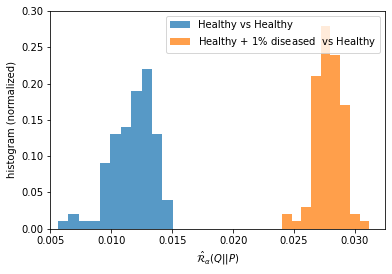

In [6]:
edges = np.arange(0.0056, 0.032, 0.00086)
plt.hist(x1, edges, weights=np.ones(len(x1)) / len(x1), density=False, alpha=0.75, label='Healthy vs Healthy')

edges2 = np.arange(0.0056, 0.032, 0.0008)
plt.hist(x2, edges2, weights=np.ones(len(x2)) / len(x2), density=False, alpha=0.75, label='Healthy + $1\%$ diseased  vs Healthy')

plt.legend(loc='upper right') 
plt.xlabel(r'$\hat{\mathcal{R}}_{\alpha}(Q ||P)$')
plt.ylabel('histogram (normalized)')

plt.xlim(0.005, 0.0325)
plt.ylim(0, 0.3)


In [7]:
# KS test
stats.ks_2samp(x1[:,0], x2[:,0])

Ks_2sampResult(statistic=0.99, pvalue=4.417521386399011e-57)